In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import sys
sys.path.append('../../source/')

from Hedge import Hedge

In [27]:

from BetaUtils import beta_hedging_ret, get_beta
from energy_functions import correlation, neg_returns, neg_sharpe, volatility

In [3]:
portfolios = []
with open('./sim041102/portfolios.txt') as f:
    for i,line in enumerate(f):
        portfolios.append(line.split(',')[1:-1])

In [5]:
portfolio = portfolios[0]
del portfolios

In [13]:
final_markets1 = []
with open('./sim041102/markets.txt') as f:
    for line in f:
        final_markets1.append(line[2:-4].split("','"))
        
market = final_markets1[0]
del final_markets1

In [17]:
market = market[0].split(',')

---

In [21]:
hedge = Hedge(stocksdir='../../data/all_stocks.csv', spydir='../../data/spy.csv', begindate='2008-10-01',enddate='2009-12-31')

In [23]:
hedge.market = market

In [24]:
hedge.portfolio = portfolio

In [25]:
spy = hedge.spy.pct_change()

In [50]:
_, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)

beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[60+1:],\
                                            hedge.dollar_market_sum_ret[60+1:])

betadf = pd.DataFrame(data = betas[1:], index=hedge.dollar_portfolio_sum_ret[60+1:].index)
betadf.columns = ['Beta']
betadf = betadf[2:]

In [48]:
spy = spy[-252:]

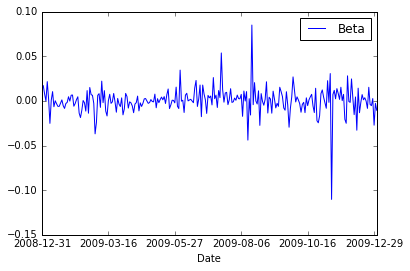

In [52]:
betadf.diff().plot()

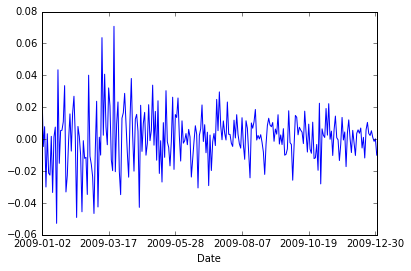

In [49]:
spy.plot()

---

Find a rank of the most correlated stocks in the universe.

In [63]:
len(hedge.dollar_portfolio_sum_ret)

316

In [64]:
len(hedge.allstock_return['AAPL'])

316

In [60]:
'aapl' not in hedge.stockuniverse

True

In [97]:
def rankCorr(hedge):
    portRet = hedge.dollar_portfolio_sum_ret.values
    
    corr_tuple_array = []
    
    for stock in hedge.stockuniverse:
        if stock not in hedge.portfolio:
            s_ret = hedge.allstock_return[stock].values
            assert len(portRet) ==len(s_ret)
            corr = np.abs(np.corrcoef(portRet[1:], s_ret[1:]))[0,1]
            corr_tuple_array.append((stock, corr))
            
    return corr_tuple_array

In [98]:
len(hedge.stockuniverse)

3781

In [99]:
%%time
corr_dict_res = rankCorr(hedge)

CPU times: user 3min 4s, sys: 32.1 s, total: 3min 36s
Wall time: 2min 49s


In [104]:
corr_dict_res_copy = corr_dict_res[:]

In [112]:
np.array([i[1] for i in corr_dict_res]).argsort()

array([3614, 3435,   31, ..., 2567,   47, 2777])

In [115]:
sort_ind = np.array([i[1] for i in corr_dict_res]).argsort()

In [118]:
np.array(corr_dict_res)[sort_ind][:,0]

array(['WFBI', 'UAMY', 'ACFC', ..., 'ONEQ', 'ACWI', 'PRFZ'], 
      dtype='|S17')

In [119]:
len(market)

100

In [120]:
market_byrank = np.array(corr_dict_res)[sort_ind][:,0][-100:]

In [121]:
market_byrank

array(['SFG', 'EMR', 'AKS', 'STR', 'CAT', 'ESV', 'KBR', 'APA', 'ITW',
       'CRS', 'EQT', 'KMT', 'EXG', 'ZF', 'PH', 'JTD', 'CSCO', 'CAM', 'XEC',
       'CEE', 'RDC', 'FFA', 'DRQ', 'EEA', 'PX', 'X', 'FLS', 'HON', 'JDD',
       'GGG', 'TDW', 'WOOD', 'NFG', 'MT', 'AVY', 'EGN', 'EVT', 'EME',
       'LECO', 'CW', 'FTI', 'MRO', 'SID', 'ROP', 'MLHR', 'SPN', 'ADRD',
       'GF', 'MTX', 'ERF', 'OIS', 'ETO', 'L', 'SCCO', 'SEIC', 'BHP',
       'NDSN', 'GLF', 'VALE', 'TS', 'LAQ', 'BBL', 'DOV', 'BBVA', 'APD',
       'UNT', 'PNR', 'GGB', 'ABB', 'WMB', 'SAN', 'QTEC', 'GAM', 'GLQ',
       'IFGL', 'USA', 'HSC', 'FOX', 'SE', 'QQXT', 'AAXJ', 'BBD', 'JCE',
       'RPM', 'TY', 'PPG', 'DD', 'ADRA', 'ALB', 'FUL', 'QCLN', 'MLI',
       'GLO', 'ADX', 'QQEW', 'ADRE', 'ACWX', 'ONEQ', 'ACWI', 'PRFZ'], 
      dtype='|S17')

---

In [124]:
hedge.market = market_byrank

In [125]:
_, betas_byrank = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)

beta_hedging_returns_byrank = beta_hedging_ret(betas_byrank[1:],hedge.dollar_portfolio_sum_ret[60+1:],\
                                            hedge.dollar_market_sum_ret[60+1:])


In [126]:
len(beta_hedging_returns)

255

In [128]:
corr_spy = np.corrcoef(beta_hedging_returns[1:], hedge.spy.pct_change()[-254:])[0,1]

In [129]:
corr_spy

0.11771886225771083

In [130]:
len(beta_hedging_returns_byrank)

255

In [131]:
corr_spy = np.corrcoef(beta_hedging_returns_byrank[1:], hedge.spy.pct_change()[-254:])[0,1]

In [132]:
corr_spy

0.048232160992086652